# 모델 테스트

In [1]:
import os

import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from PIL import Image
from torchvision import transforms

from utils.data_loading import BasicDataset
from unet import UNet
from utils.utils import plot_img_and_mask

In [2]:
n_classes = 7

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

net = UNet(n_channels=3, n_classes=n_classes, bilinear=False)
net.to(device=device)
state_dict = torch.load(os.path.join(os.getcwd(), "checkpoint_epoch10_d.pth"), map_location=device)
mask_values = state_dict.pop('mask_values', [0, 1])
net.load_state_dict(state_dict)

<All keys matched successfully>

In [3]:
net.eval()

UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 

In [12]:
img_f = Image.open(os.path.join("image_test", "pyoderma(Veterinary_medicine).jpg"))
img = torch.from_numpy(BasicDataset.preprocess(None, img_f, 1, is_mask=False))
img = img.unsqueeze(0)
img = img.to(device=device, dtype=torch.float32)

In [13]:
with torch.no_grad():
    output = net(img).cpu()
    
output.shape

torch.Size([1, 7, 260, 450])

In [14]:
output[0].argmax(dim=0)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

[0 2 3 5 6]
[83886  1973     7  9681 21453]


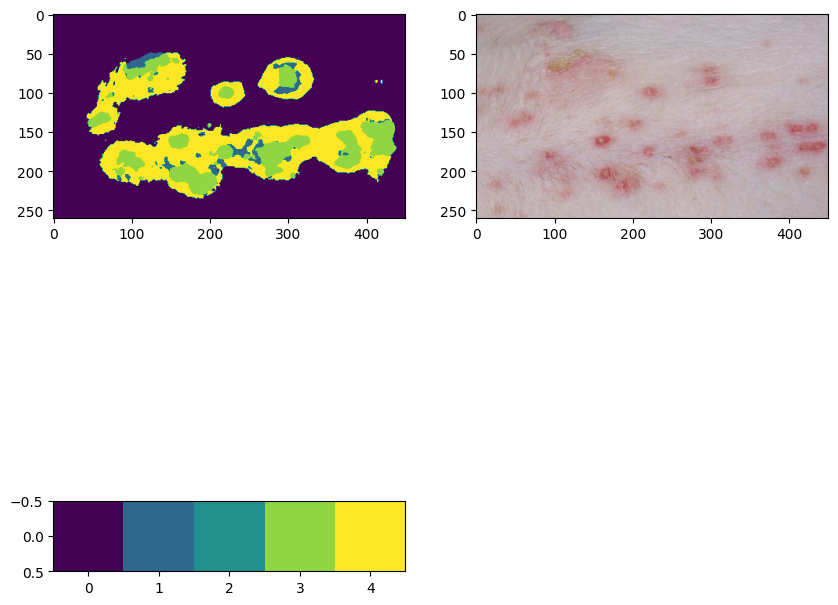

In [15]:
tmp = output[0].numpy().argmax(axis=0)
unique, counts = np.unique(tmp, return_counts = True)
print(unique)
print(counts)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(output[0].argmax(dim=0))
plt.subplot(2, 2, 2)
plt.imshow(img_f)
plt.subplot(2, 2, 3)
plt.imshow(np.expand_dims(np.array(unique), axis=0))

2


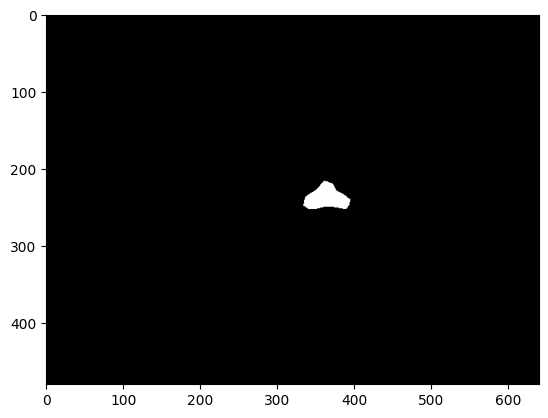

In [17]:
np_f = np.load(os.path.join("image_test", "_A2_004657_mask.npy"))
print(np_f.max())
plt.imshow(np_f, cmap = cm.gray)